In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 加载数据

In [2]:
train_data = pd.read_csv("D:/workspace/spark-tools/src/main/data/house-prices/train.csv")
test_data = pd.read_csv("D:/workspace/spark-tools/src/main/data/house-prices/test.csv")

In [3]:
# from sklearn import datasets
# boston = datasets.load_boston()
# print(boston)

# 数据勘探

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

# 勘探因变量Y的分布

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 直方图 -- 因变量SalePrice

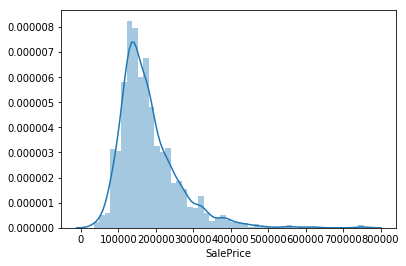

In [8]:
sns.distplot(train_data["SalePrice"])

## 对y做平滑处理

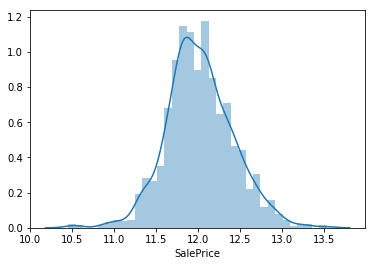

In [9]:
sns.distplot(np.log1p(train_data["SalePrice"]))

## 尝试y在两种情况，模型的最终效果

# 单变量勘探分析

## 类别变量

In [10]:
category_features = train_data.dtypes[train_data.dtypes == "object"].index

In [11]:
category_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## 类别变量分布，计数统计条形图

### 区域分类

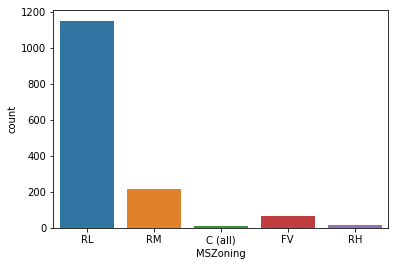

In [12]:
sns.countplot(train_data["MSZoning"])

### 住宅类型 

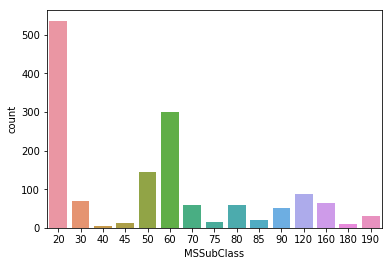

In [13]:
sns.countplot(train_data["MSSubClass"])

### 将所有类别变量画图 计数统计

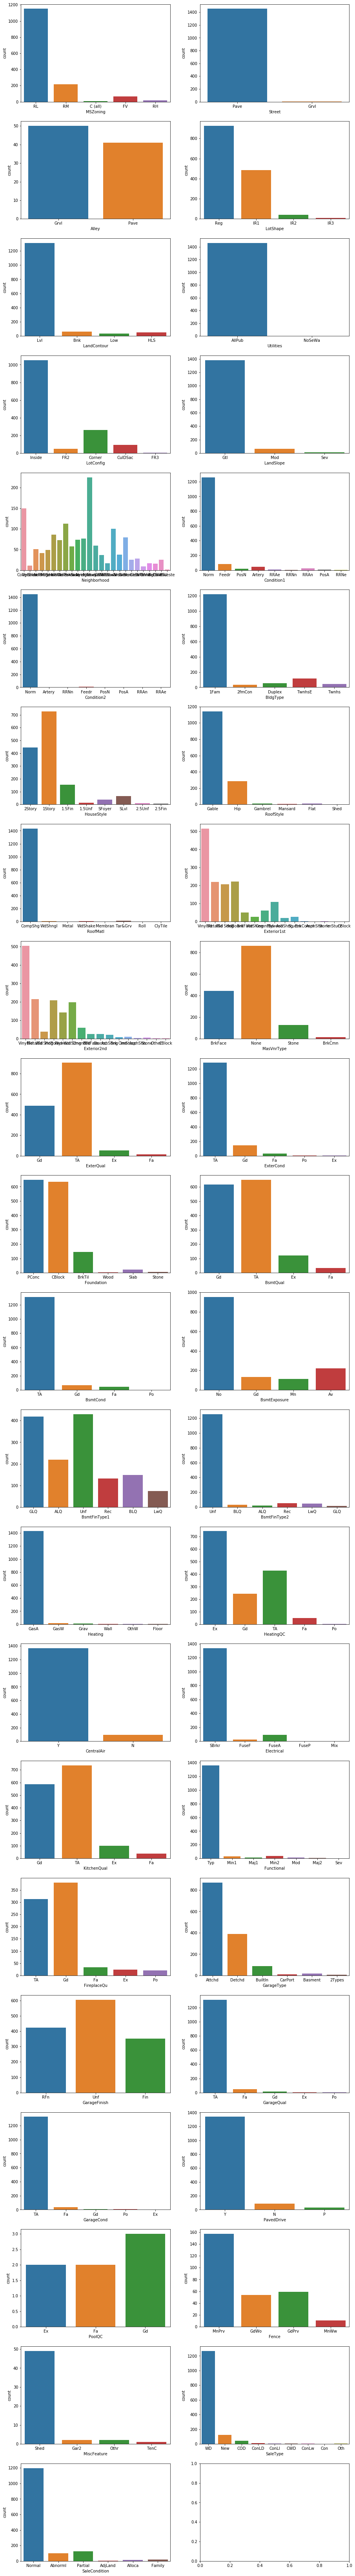

In [14]:
# 12 * 4 的 图形显示
indexi = 0
indexj = 0
f, axes = plt.subplots(22, 2, figsize=(15, 120))
for category_feature in category_features:
    sns.countplot(x=category_feature,data =train_data,ax=axes[indexi,indexj])
    if indexj == 1:
        indexi = indexi + 1
    if indexj == 0: 
        indexj = 1
    else:
        indexj = 0        

## 数值型变量，直方图

# 缺失值填充

In [15]:
numeric_features = train_data.dtypes[train_data.dtypes != "object"].index

In [16]:
numeric_features.drop("Id")

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

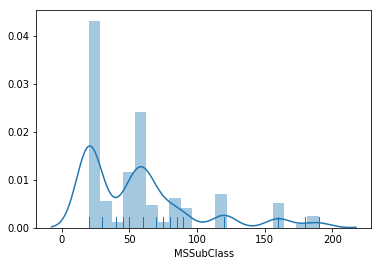

In [17]:
# sns.distplot(train_data["MSSubClass"])
# sns.distplot(train_data["MSSubClass"], bins=20, kde=False, rug=True);#设置了20个矩形条
sns.distplot(train_data["MSSubClass"], hist=True, rug=True);#关闭直方图，开启rug细条

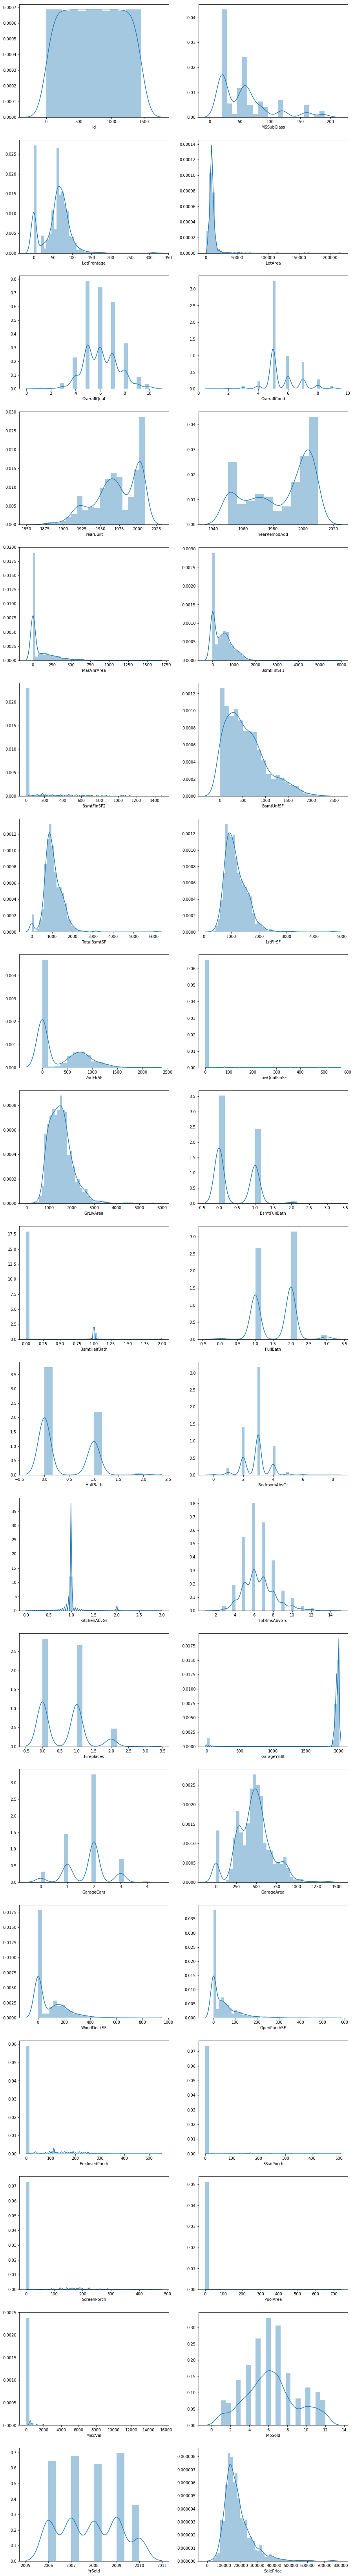

In [18]:
# 缺失值nan填充
train_data_draw = train_data.where(train_data.notnull(), 0)
# train_data.fillna(0,inplace=True)
# print(train_data)
# # 12 * 4 的 图形显示
indexi = 0
indexj = 0
f, axes = plt.subplots(19, 2, figsize=(15, 120))
for numeric_feature in numeric_features:
    sns.distplot(a=train_data_draw[numeric_feature],ax=axes[indexi,indexj])
    if indexj == 1:
        indexi = indexi + 1
    if indexj == 0: 
        indexj = 1
    else:
        indexj = 0 

## 类别变量缺失值处理

### 缺失值统计排序

In [19]:
# 测试demo
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5,3),index=list('abcde'),columns=['one','two','three'])
df.iloc[1,:-1] = np.nan
df.iloc[1:-1,2] = np.nan

# print(df[["one","two","three"]].fillna(df[["one","two","three"]].mean()))
print(df.mean())

one     -0.492819
two      0.008040
three    0.654409
dtype: float64


In [20]:
print(category_features)
total = train_data[category_features].isnull().sum().sort_values(ascending=False)
# 缺失值统计
t = train_data[category_features].isnull().sum()
t1 = train_data[category_features].isnull().count()
# 缺失值占比
percent = (t/t1).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479
BsmtFinType2,38,0.026027


### 删除缺失率大于 0.3的变量

In [21]:
category_features = (missing_data[missing_data['Percent'] < 0.3]).index
category_features

Index(['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
       'MasVnrType', 'Electrical', 'Condition2', 'Condition1', 'Neighborhood',
       'LandSlope', 'BldgType', 'LandContour', 'LotConfig', 'Utilities',
       'RoofStyle', 'LotShape', 'Street', 'HouseStyle', 'SaleCondition',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'SaleType', 'Heating', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'Functional', 'PavedDrive', 'MSZoning'],
      dtype='object')

### 缺失值处理，众数填充

#### 特别备注 mode 的使用，因为frequency可能存在多个值，所以返回的是dataframe格式

In [22]:
# print(train_data[category_features].fillna(train_data[category_features].mode()))
t = train_data[category_features].mode().iloc[0]
train_data_category = train_data[category_features].fillna(t)
# print(train_data_category)

test_t = test_data[category_features].mode().iloc[0]
test_data_category = test_data[category_features].fillna(test_t)
print(test_data_category)
# print(category_features)
# test_data.info()

     GarageCond GarageQual GarageFinish GarageType BsmtFinType2 BsmtExposure  \
0            TA         TA          Unf     Attchd          LwQ           No   
1            TA         TA          Unf     Attchd          Unf           No   
2            TA         TA          Fin     Attchd          Unf           No   
3            TA         TA          Fin     Attchd          Unf           No   
4            TA         TA          RFn     Attchd          Unf           No   
5            TA         TA          Fin     Attchd          Unf           No   
6            TA         TA          Fin     Attchd          Unf           No   
7            TA         TA          Fin     Attchd          Unf           No   
8            TA         TA          Unf     Attchd          Unf           Gd   
9            TA         TA          Fin     Attchd          Rec           No   
10           TA         TA          Fin     Attchd          BLQ           No   
11           TA         TA          Unf 

## 数值型变量缺失值处理

### 类别变量缺失值统计排序

In [23]:
numeric_features = numeric_features.drop("Id")
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
total_numeric = train_data[numeric_features].isnull().sum().sort_values(ascending=False)
# 缺失值统计
t_numeric = train_data[numeric_features].isnull().sum()
t1_numeric = train_data[numeric_features].isnull().count()
# 缺失值占比
percent = (t_numeric/t1_numeric).sort_values(ascending=False)
missing_data_numeric = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_numeric

,Total,Percent
1stFlrSF,NaN,0.000000
2ndFlrSF,NaN,0.000000
3SsnPorch,NaN,0.000000
Alley,1369.0,NaN
BedroomAbvGr,NaN,0.000000
BldgType,0.0,NaN
BsmtCond,37.0,NaN
BsmtExposure,38.0,NaN
BsmtFinSF1,NaN,0.000000
BsmtFinSF2,NaN,0.000000


### 缺失值处理，平均值填充

In [25]:
# 数值型变量使用平均数填充
t_numeric = train_data[numeric_features].mean()
train_data_numeric = train_data[numeric_features].fillna(t_numeric)
# print(train_data_numeric)

test_numeric_features = numeric_features.drop("SalePrice")
# print(test_numeric_features)

test_numeric = test_data[test_numeric_features].mean()
test_data_numeric = test_data[test_numeric_features].fillna(test_numeric)
print(test_data_numeric)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             20    80.000000    11622            5            6       1961   
1             20    81.000000    14267            6            6       1958   
2             60    74.000000    13830            5            5       1997   
3             60    78.000000     9978            6            6       1998   
4            120    43.000000     5005            8            5       1992   
5             60    75.000000    10000            6            5       1993   
6             20    68.580357     7980            6            7       1992   
7             60    63.000000     8402            6            5       1998   
8             20    85.000000    10176            7            5       1990   
9             20    70.000000     8400            4            5       1970   
10           120    26.000000     5858            7            5       1999   
11           160    21.000000     1680            6 

In [26]:
train_data[numeric_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [27]:
train_data = train_data_category.join(train_data_numeric)
# print(train_data)

test_data_new = test_data_category.join(test_data_numeric)
print(test_data_new)

     GarageCond GarageQual GarageFinish GarageType BsmtFinType2 BsmtExposure  \
0            TA         TA          Unf     Attchd          LwQ           No   
1            TA         TA          Unf     Attchd          Unf           No   
2            TA         TA          Fin     Attchd          Unf           No   
3            TA         TA          Fin     Attchd          Unf           No   
4            TA         TA          RFn     Attchd          Unf           No   
5            TA         TA          Fin     Attchd          Unf           No   
6            TA         TA          Fin     Attchd          Unf           No   
7            TA         TA          Fin     Attchd          Unf           No   
8            TA         TA          Unf     Attchd          Unf           Gd   
9            TA         TA          Fin     Attchd          Rec           No   
10           TA         TA          Fin     Attchd          BLQ           No   
11           TA         TA          Unf 

# 变量关联性分析

## 箱型图，探索类别变量与因变量的关联关系

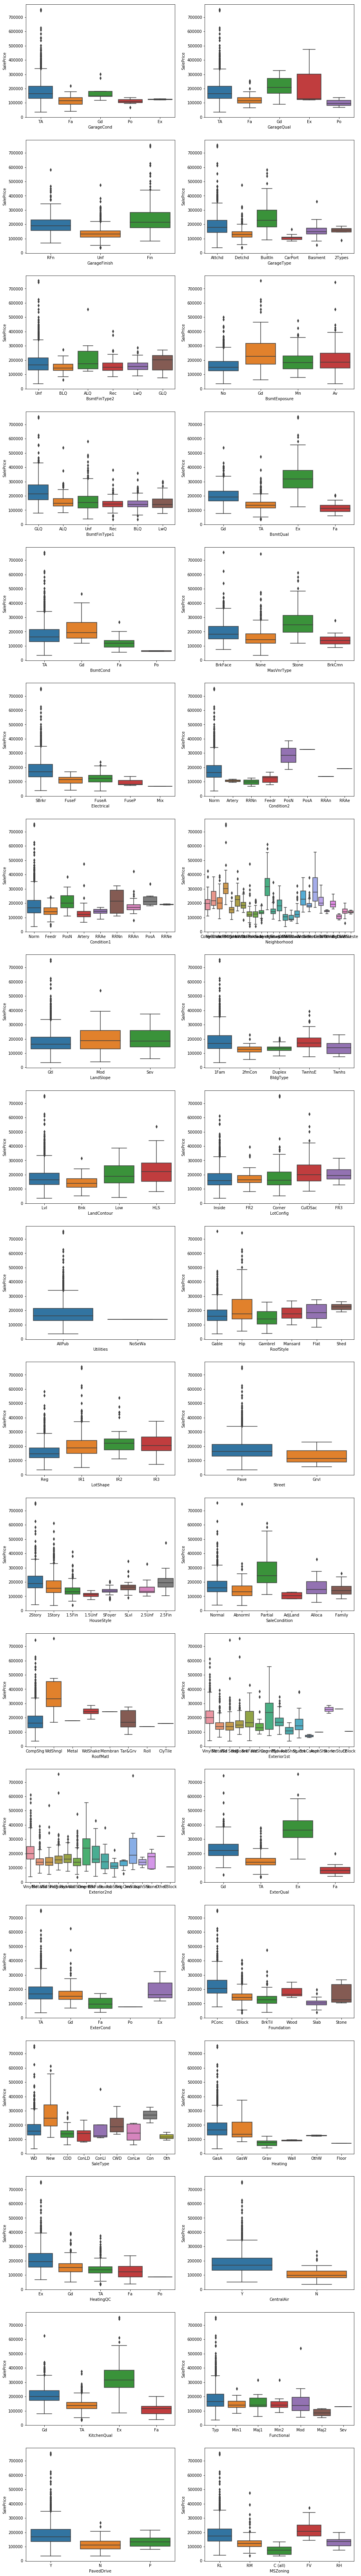

In [28]:
# 箱型图 探索类别变量与因变量的关联关系
# f, axes = plt.subplots(figsize=22, 2))
# sns.boxplot(x="OverallQual", y="SalePrice", data=train_data)

indexi = 0
indexj = 0
f, axes = plt.subplots(19, 2, figsize=(15, 120))
for category_feature in category_features:
    sns.boxplot(x=category_feature,y="SalePrice",data=train_data,ax=axes[indexi,indexj])
    if indexj == 1:
        indexi = indexi + 1
    if indexj == 0: 
        indexj = 1
    else:
        indexj = 0   

## 散点图 探索数字变量与因变量的关联关系

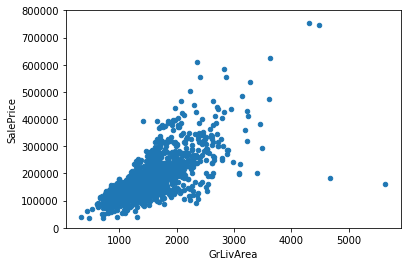

In [29]:
train_data[["SalePrice","GrLivArea"]].plot.scatter(x="GrLivArea",y="SalePrice",ylim=(0,800000))

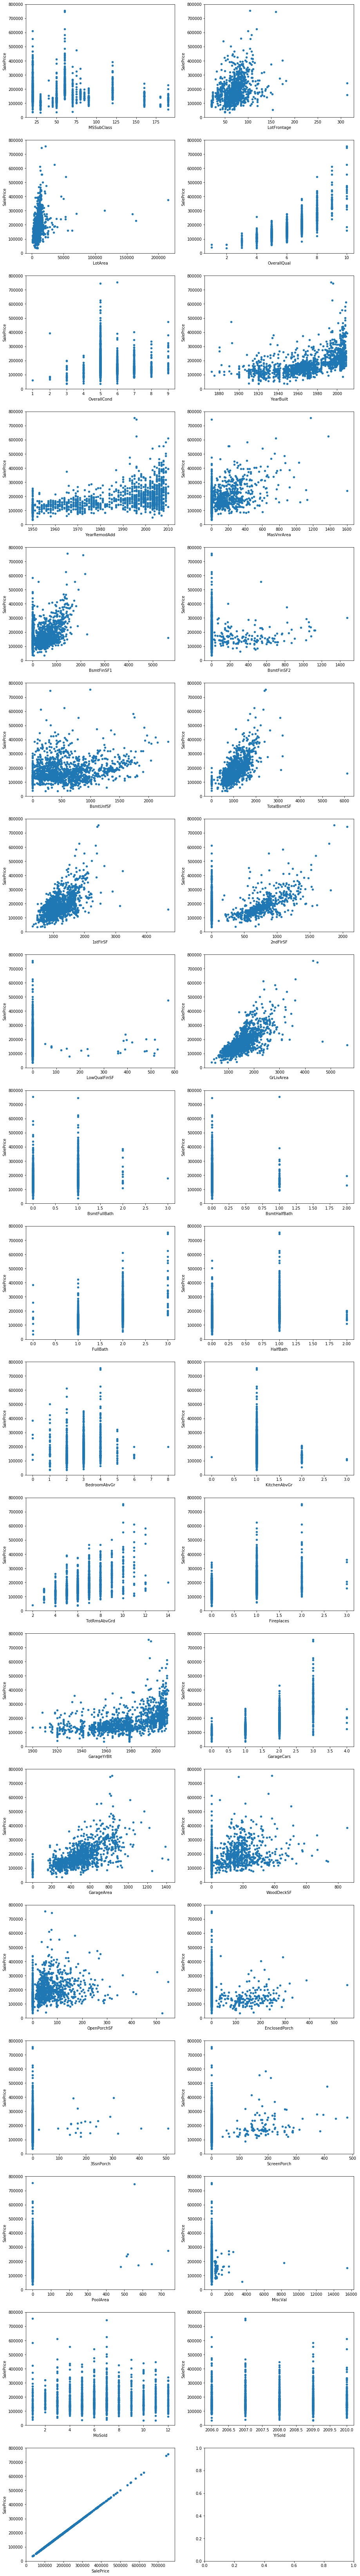

In [30]:
indexi = 0
indexj = 0
f, axes = plt.subplots(19, 2, figsize=(15, 120))
for numeric_feature in numeric_features:
    train_data[["SalePrice",numeric_feature]].plot.scatter(x=numeric_feature,y="SalePrice",ylim=(0,800000),ax=axes[indexi,indexj])
    if indexj == 1:
        indexi = indexi + 1
    if indexj == 0: 
        indexj = 1
    else:
        indexj = 0 

## 因变量相关性topn的变量

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath'],
      dtype='object')


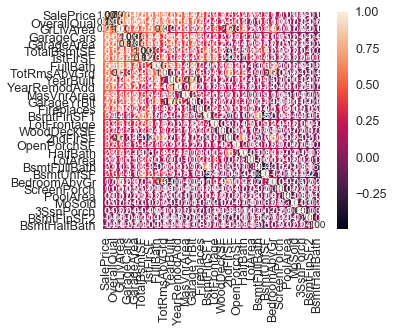

In [31]:
corrmat = train_data.corr()
k = 30
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
print(cols)

# 全变量相关性分析

## 协方差函数

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.082746  0.013788     0.550684     0.073741   
MasVnrArea       0.022895     0.179283  0.103960     0.410238    -0.127788   
BsmtFinSF1      -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808   

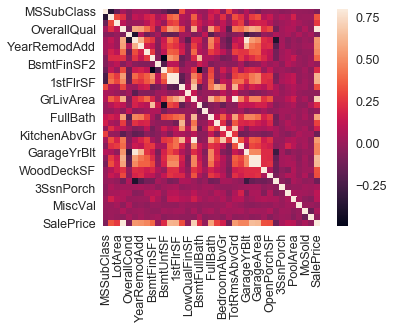

In [32]:
corrmat = train_data.corr()
print(corrmat)
sns.heatmap(corrmat,vmax= 0.8,square=True)

## 多重共线性分析

# 异常值处理

## 分位数替代

## 极端值、离群点删除

# 哑变量处理

In [33]:
# 将所有类别变量转换成哑变量

for cols in train_data.columns:
    if train_data[cols].dtype == np.object:
        train_data = pd.concat((train_data, pd.get_dummies(train_data[cols], prefix=cols)), axis=1)
        del train_data[cols]
print(train_data)        

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60    65.000000     8450            7            5       2003   
1             20    80.000000     9600            6            8       1976   
2             60    68.000000    11250            7            5       2001   
3             70    60.000000     9550            7            5       1915   
4             60    84.000000    14260            8            5       2000   
5             50    85.000000    14115            5            5       1993   
6             20    75.000000    10084            8            5       2004   
7             60    70.049958    10382            7            6       1973   
8             50    51.000000     6120            7            5       1931   
9            190    50.000000     7420            5            6       1939   
10            20    70.000000    11200            5            5       1965   
11            60    85.000000    11924            9 

# 数值变量标准化处理

In [34]:
## Standardizing numeric features
numeric_features = train_data.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

d:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
d:\python36\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


# 特征变量挑选

## 决策树、随机森林按特征重要筛选

In [35]:
from sklearn.ensemble import RandomForestRegressor
# 按照特征重要性, 进行降序排列, 最重要的特征在最前面
etr = RandomForestRegressor(n_estimators=400)
train_y = train_data["SalePrice"]
train_x = train_data.drop(['SalePrice'], axis=1)
etr.fit(train_x, train_y)
imp = pd.DataFrame({'feature': train_x.columns, 'score': etr.feature_importances_})
# print(imp.sort(['score'], ascending=[0]))  
# print(imp.sort_values)

In [36]:
print(imp.sort_values(by='score',ascending=False))
# imp.to_csv("D:/workspace/spark-tools/src/main/data/house-prices/feature_importances1.csv", index=False)

                   feature         score
3              OverallQual  5.749878e-01
15               GrLivArea  1.099876e-01
11             TotalBsmtSF  3.853866e-02
13                2ndFlrSF  3.751214e-02
8               BsmtFinSF1  2.719455e-02
12                1stFlrSF  2.469464e-02
25              GarageCars  2.064790e-02
26              GarageArea  1.526274e-02
2                  LotArea  1.399663e-02
5                YearBuilt  9.075222e-03
22            TotRmsAbvGrd  6.795125e-03
1              LotFrontage  6.751059e-03
6             YearRemodAdd  6.077078e-03
18                FullBath  5.875988e-03
10               BsmtUnfSF  5.040244e-03
27              WoodDeckSF  4.639214e-03
7               MasVnrArea  4.468381e-03
4              OverallCond  4.437704e-03
24             GarageYrBlt  4.421681e-03
28             OpenPorchSF  4.356069e-03
71             BsmtQual_Ex  3.853251e-03
48        GarageFinish_Unf  3.681435e-03
34                  MoSold  3.504777e-03
23              

In [37]:
# 选择前40个变量
# print(imp.score,imp.feature)
# print(imp.where(imp[score] > 0.0005))
result_feature = imp[(imp['score'] > 0.0005)]["feature"]
tt = result_feature.values.tolist()
print(tt)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'GarageFinish_Unf', 'GarageType_Attchd', 'GarageType_Detchd', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'BsmtQual_Ex', 'BsmtQual_Gd', 'MasVnrType_Stone', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'LandContour_Bnk', 'LotShape_Reg', 'SaleCondition_Partial', 'RoofMatl_CompShg', 'Exterior2nd_HdBoard', 'Exterior2nd_VinylSd', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'SaleType_WD', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'MSZoning_RL', 'MSZoning_R

## lasso回归

## 统计量分析，自变量与因变量相关性

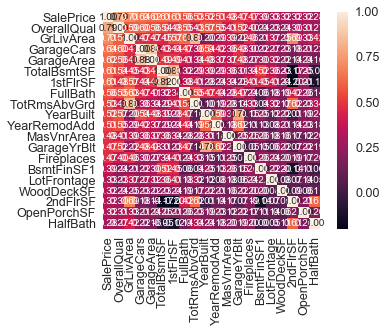

In [38]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 模型训练

## 使用GBDT方法

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import scipy as sp  

# 模型方法
gbrt = GradientBoostingRegressor(
    random_state=1,
    learning_rate=0.015,
    min_samples_split=2,
    max_features='sqrt',   # 分裂的feature是随机挑选的
    n_estimators=60,
    min_samples_leaf=1,
    subsample=0.2,
    max_depth=4,
)

# 训练数据准备
X_train_original = train_data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'GarageFinish_Unf', 'GarageType_Attchd', 'GarageType_Detchd', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'BsmtQual_Ex', 'BsmtQual_Gd', 'MasVnrType_Stone', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'LandContour_Bnk', 'LandContour_Lvl', 'LotShape_Reg', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'SaleType_WD', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'MSZoning_RL', 'MSZoning_RM']]
# X_train_original = train_data['SaleCondition_Normal', 'Exterior1st_HdBoard', 'MSZoning_RL', 'GarageFinish_Fin', 'RoofStyle_Hip', 'Neighborhood_NoRidge', 'KitchenAbvGr', 'Exterior1st_VinylSd', 'Neighborhood_Crawfor', 'SaleType_New', 'MasVnrType_Stone', 'Exterior2nd_VinylSd', 'EnclosedPorch', 'ExterQual_TA', 'LandContour_Lvl', 'Exterior2nd_HdBoard', 'SaleType_WD', 'GarageType_Attchd', 'BsmtFinType1_GLQ', 'KitchenQual_TA', 'HalfBath', 'ExterQual_Gd', 'BsmtFullBath', 'BsmtExposure_No', 'LotShape_Reg', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'MSZoning_RM', 'CentralAir_N', 'MSSubClass', 'YrSold', 'CentralAir_Y', 'BsmtQual_Gd', 'ScreenPorch', 'KitchenQual_Gd', 'BedroomAbvGr', 'ExterQual_Ex', 'GarageType_Detchd', 'BsmtQual_Ex', 'MoSold', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OverallCond', 'MasVnrArea', 'OpenPorchSF', 'GarageFinish_Unf', 'BsmtUnfSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd', 'LotFrontage', 'YearBuilt', 'LotArea', 'GarageArea', 'GarageCars', '1stFlrSF', 'BsmtFinSF1', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'OverallQual']
Y_train_original = train_data["SalePrice"]
# split data
X_train,X_test,Y_train,Y_test = train_test_split(X_train_original,Y_train_original,test_size=0.1,random_state=3)
# 模型训练
gbrt.fit(X_train, Y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.015, loss='ls', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=60, presort='auto',
             random_state=1, subsample=0.2, verbose=0, warm_start=False)

## 使用交叉验证的方法

In [40]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

print("################")
train = train_data[['SalePrice','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'GarageFinish_Unf', 'GarageType_Attchd', 'GarageType_Detchd', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'BsmtQual_Ex', 'BsmtQual_Gd', 'MasVnrType_Stone', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'LandContour_Bnk', 'LandContour_Lvl', 'LotShape_Reg', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'SaleType_WD', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'MSZoning_RL', 'MSZoning_RM']]

# Validation function
n_folds = 5

# 交叉验证
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Y_train_original, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

GBoost = GradientBoostingRegressor(n_estimators=30, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

################
Gradient Boosting score: 37226.5335 (6252.1430)



# 回归模型的评估

In [41]:
# print(gbrt.predict(X_test))
import math

def rmse(y_test, y): 
    return sp.sqrt(sp.mean((y_test - y) ** 2))
rmse_result = rmse(Y_test,gbrt.predict(X_test))
mse = math.sqrt(mean_squared_error(Y_test, gbrt.predict(X_test)))
print("rmse_result: %.4f" % rmse_result)
print("MSE: %.4f" % mse)

# 交叉验证模型评分

rmse_result: 42304.9166
MSE: 42304.9166


# 提交预测结果

In [42]:
# 空值填充
 
# 缺失值处理
# 哑变量处理
test_data_new = pd.get_dummies(test_data_new)
for cols in test_data_new.columns:
    if test_data_new[cols].dtype == np.object:
        test_data_new = pd.concat((test_data_new, pd.get_dummies(test_data_new[cols], prefix=cols)), axis=1)
        del test_data_new[cols]
# print(test_data_new)        


# print(test_data_new)
X_test_original = test_data_new[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'GarageFinish_Unf', 'GarageType_Attchd', 'GarageType_Detchd', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'BsmtQual_Ex', 'BsmtQual_Gd', 'MasVnrType_Stone', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'LandContour_Bnk', 'LandContour_Lvl', 'LotShape_Reg', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'SaleType_WD', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'MSZoning_RL', 'MSZoning_RM']]
# print(X_test_original)
# # print(test_data[[ 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'GarageFinish_Unf', 'GarageType_Attchd', 'GarageType_Detchd', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'BsmtQual_Ex', 'BsmtQual_Gd', 'MasVnrType_Stone', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'LandContour_Bnk', 'LandContour_Lvl', 'LotShape_Reg', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'SaleType_WD', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'MSZoning_RL', 'MSZoning_RM']])
imp_model_prices = gbrt.predict(X_test_original)
my_submission=pd.DataFrame({'ID': test_data.Id, 'SalePrice': imp_model_prices})
my_submission.head()
my_submission.to_csv('D:/workspace/spark-tools/src/main/data/house-prices/imp_submission.csv',index=False)